# Prediction of Term Deposit Subsicription 

Hazırlayan: Volkan Arıkan

## Dataset  -  Attributes

* age : age of customer (numeric)
* job : type of job (categorical)
* marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (binary)
* balance: average yearly balance, in euros (numeric)
* housing: has a housing loan? (binary)
* loan: has personal loan? (binary)
* contact: contact communication type (categorical)
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical)
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


In [176]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

from sklearn import preprocessing

In [177]:
df=pd.read_csv("C:/Users/Volkan ARIKAN/Desktop/term-deposit-marketing-2020.csv")

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [180]:
for col in df.columns:
    print(col, df[col].nunique())

age 70
job 12
marital 3
education 4
default 2
balance 6849
housing 2
loan 2
contact 3
day 31
month 11
duration 1535
campaign 48
y 2


### Examination of Numerical Values
Histogram and boxplot graphs of numerical attributes were drawn in order to distinguish possible outliers.

In [181]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021273366588>,
      dtype=object)

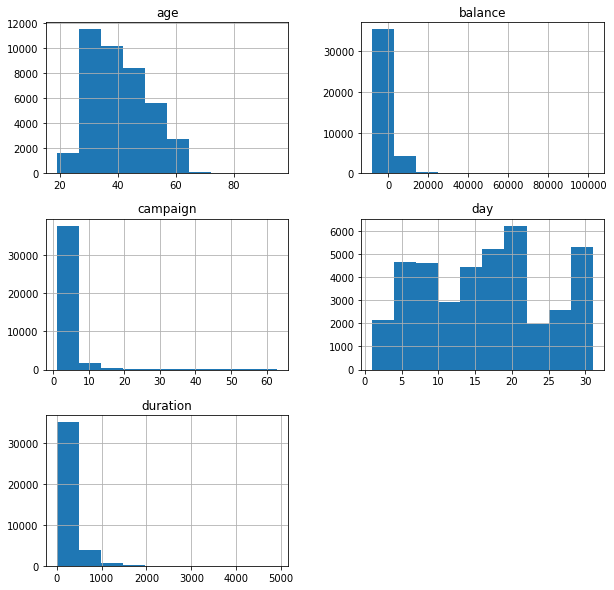

In [182]:
num_attributes.hist(figsize=(10,10))

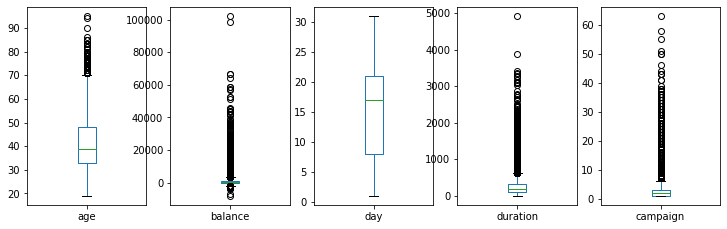

In [183]:
df.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False,figsize=(15,8))
plt.show()

It is seen from histogram graphs that age variable is skewed to the left and day attribute is closer to the relative normal distribution when compared to other variables. Since the ratio of 0 is high in campaign, duration and balance variables, a structure gathered on the left stands out. It can be seen from box plots that each of numerical attributes contain some outliers that should be cleaned.

In most large data sets, 99% of values have a Z-score between -3 and 3, meaning they lie within three standard deviations above or below the mean. So, we should delete instances which are not within 3 standard deviations above or below the mean.

In [184]:
from scipy.stats import zscore

df['zscore_age']=zscore(df['age'])
outliers_age=df.loc[df['zscore_age'].abs()>3]
print("Number of Outliers in the column of age:", outliers_age.shape[0])
df=df[df['zscore_age'].abs()<=3]

df['zscore_balance']=zscore(df['balance'])
outliers_balance=df.loc[df['zscore_balance'].abs()>3]
print("Number of Outliers in the column of balance:", outliers_balance.shape[0])
df=df[df['zscore_balance'].abs()<=3]

df['zscore_day']=zscore(df["day"])
outliers_day=df.loc[df['zscore_day'].abs()>3]
print("Number of Outliers in the column of day:", outliers_day.shape[0])
df=df[df['zscore_day'].abs()<=3]

df['zscore_duration']=zscore(df["duration"])
outliers_duration=df.loc[df['zscore_duration'].abs()>3]
print("Number of Outliers in the column of duration:", outliers_duration.shape[0])
df=df[df['zscore_duration'].abs()<=3]

df['zscore_campaign']=zscore(df["campaign"])
outliers_campaign=df.loc[df['zscore_campaign'].abs()>3]
print("Number of Outliers in the column of campaign:", outliers_campaign.shape[0])
df=df[df['zscore_campaign'].abs()<=3]

print("New shape of df after cleaning outliers:",df.shape)
    

Number of Outliers in the column of age: 89
Number of Outliers in the column of balance: 672
Number of Outliers in the column of day: 0
Number of Outliers in the column of duration: 843
Number of Outliers in the column of campaign: 812
New shape of df after cleaning outliers: (37584, 19)


C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
df=df.drop(["zscore_age", "zscore_balance","zscore_day","zscore_duration","zscore_campaign"], 1)

In [186]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Examination of Categorical Values
Barcharts were drawn examine categorical values.

In [187]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')


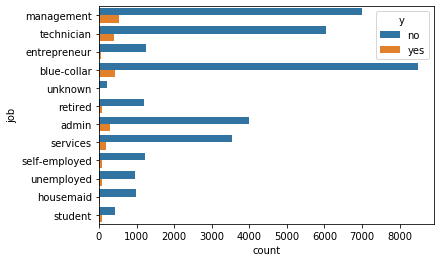

In [188]:
sns.countplot(y='job', hue='y', data = cat_attributes)

The number of blue-collar workers is the highest but people working in management have highest subscription rate.

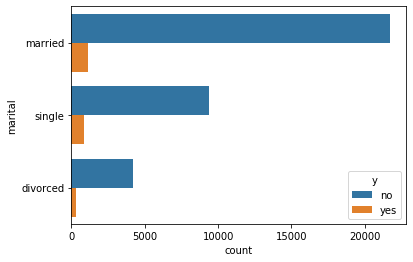

In [189]:
sns.countplot(y='marital', hue='y', data = cat_attributes)

Number of married people are much more than the number of single and divorced people but the rate of subscription of single people is higher that others.

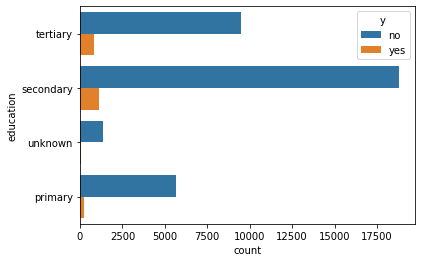

In [190]:
sns.countplot(y='education', hue='y', data = cat_attributes)

Although most of the people completed secondary education, subscription rate of people comleted tertiary education is the highest.

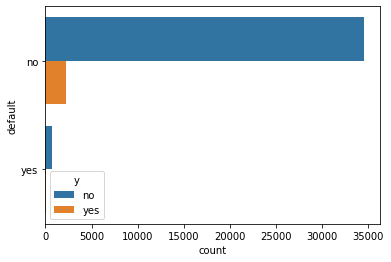

In [191]:
sns.countplot(y='default', hue='y', data = cat_attributes)

Most of the people don't have credit in default but still subscription rates are almost the same.

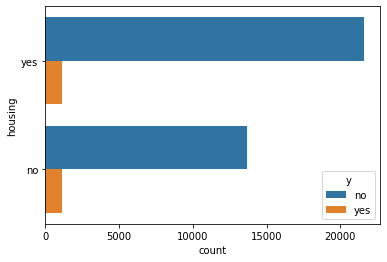

In [192]:
sns.countplot(y='housing', hue='y', data = cat_attributes)

In [276]:
print("subscription rate of people having housing loan:", round((df[(df.housing=="yes")&(df.y=="yes")].shape[0])/(df[df.housing=="yes"].shape[0])*100,2),"%")
print("subscription rate of people having no housing loan:", round((df[(df.housing=="no")&(df.y=="yes")].shape[0])/(df[df.housing=="no"].shape[0])*100,2),"%")


subscription rate of people having housing loan: 4.94 %
subscription rate of people having no housing loan: 7.73 %


It's obvious that having a housing loan has a big effect on subscription to a term deposit.

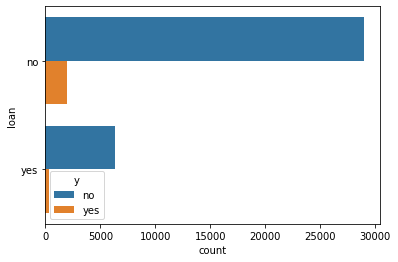

In [193]:
sns.countplot(y='loan', hue='y', data = cat_attributes)

Most of people have no personal loan and their subscription rate is almost 50% higher that people having personal loan.

In [274]:
print("subscription rate of people having personal loan:", round((df[(df.loan=="yes")&(df.y=="yes")].shape[0])/(df[df.loan=="yes"].shape[0])*100,2),"%")
print("subscription rate of people having no personal loan:", round((df[(df.loan=="no")&(df.y=="yes")].shape[0])/(df[df.loan=="no"].shape[0])*100,2),"%")


subscription rate of people having personal loan: 4.34 %
subscription rate of people having no personal loan: 6.4 %


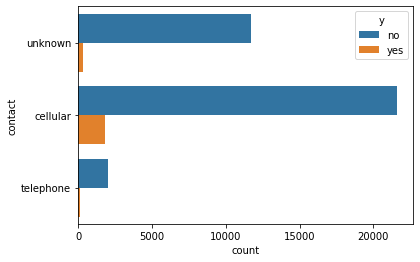

In [194]:
sns.countplot(y='contact', hue='y', data = cat_attributes)

Highest subscription rates are achieved with cellular contact type.

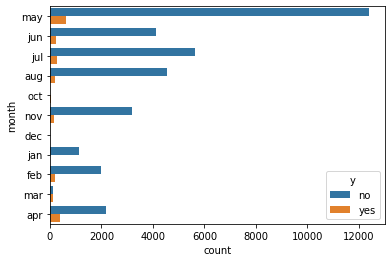

In [195]:
sns.countplot(y='month', hue='y', data = cat_attributes)

Most of the people subscribed to a term deposit with having last contact in april.

### Dealing with Categorical and Numerical Variables
Normalization of numerical variables is done and it is checked if they have high correlation rate with each other.

In [204]:
numeric_features = [column_name for column_name in df
                    if df[column_name].dtype.kind in ('i', 'f')]

min_max_scaler = preprocessing.MinMaxScaler()
df[numeric_features] = min_max_scaler.fit_transform(df[numeric_features])
df[numeric_features].head()

,age,balance,day,duration,campaign
0,0.78,0.534387,0.133333,0.252662,0.0
1,0.50,0.408726,0.133333,0.146176,0.0
2,0.28,0.407121,0.133333,0.073572,0.0
3,0.56,0.496523,0.133333,0.089061,0.0
4,0.28,0.407062,0.133333,0.191675,0.0


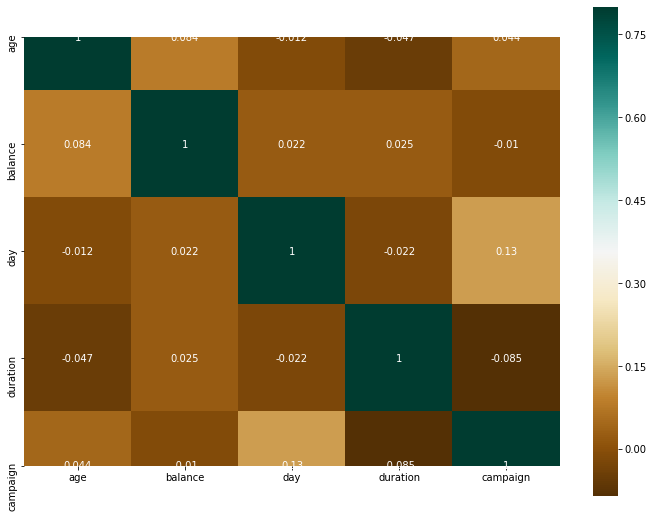

In [205]:
hmap = df[numeric_features].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

When the correlation matrix is examined, it is seen that the highest correlation is between day and campaign (r: 0.13) but the correlation is low.

In [206]:
#Transforming categorical values to numerical values 
from category_encoders import OneHotEncoder

encoded_features = OneHotEncoder(cols=['job', 'marital', 'education', 'default',
'housing', 'loan','contact','month', 'y'], use_cat_names=True)
df_ohe = encoded_features.fit_transform(df)

,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin,job_services,job_self-employed,...,month_nov,month_dec,month_jan,month_feb,month_mar,month_apr,duration,campaign,y_no,y_yes
0,0.78,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.252662,0.0,1,0
1,0.50,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.146176,0.0,1,0
2,0.28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.073572,0.0,1,0
3,0.56,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.089061,0.0,1,0
4,0.28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.191675,0.0,1,0


In [208]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37584 entries, 0 to 39999
Data columns (total 46 columns):
age                    37584 non-null float64
job_management         37584 non-null int64
job_technician         37584 non-null int64
job_entrepreneur       37584 non-null int64
job_blue-collar        37584 non-null int64
job_unknown            37584 non-null int64
job_retired            37584 non-null int64
job_admin              37584 non-null int64
job_services           37584 non-null int64
job_self-employed      37584 non-null int64
job_unemployed         37584 non-null int64
job_housemaid          37584 non-null int64
job_student            37584 non-null int64
marital_married        37584 non-null int64
marital_single         37584 non-null int64
marital_divorced       37584 non-null int64
education_tertiary     37584 non-null int64
education_secondary    37584 non-null int64
education_unknown      37584 non-null int64
education_primary      37584 non-null int64
default_n

In [214]:
X=df_ohe.drop(["y_yes","y_no"], 1)
y=df_ohe[["y_yes", "y_no"]]

In [215]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [222]:
from sklearn.model_selection import cross_val_score
print("Accuracy of random forest model using 5 fold cross validation metric:", round(cross_val_score(model, X, y, cv=5).mean()*100,2),"%")

C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Volkan ARIKAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Volkan ARIKAN\Anaconda3\lib\site-pa

Accuracy of random forest model using 5 fold cross validation metric: 91.72 %


### BONUS: Customer Segmentation

In [298]:
df_new=pd.read_csv("C:/Users/Volkan ARIKAN/Desktop/term-deposit-marketing-2020.csv")

df_new.groupby(["y"])["duration","age","day","balance","campaign"].mean()

,duration,age,day,balance,campaign
y,,,,,
no,221.408042,40.599208,16.032072,1249.752533,2.918688
yes,682.958564,39.844959,15.827003,1588.495856,2.414365


It can be seen from the table above that duration of the last contact has a big effect on term deposit subscription. Although age and campaign doesn't seem to have much effect, having a better balance motivates people for subscription.

As examined with histograms, having housing or personal loan has also big effect on subscription. As a result, customers with better balance, longer last contact time, having no personal or housing loan are more willing to subscribe to a term deposit.